In [1]:
import numpy as np 
import cv2 
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib 
import matplotlib.colors as colors
from PIL import Image
from __future__ import print_function
import argparse
from IPython.display import Image
from IPython.display import display

file_path = "C:/Users/aya-k/OneDrive/Bureau/VMI_M2/Projet_image/Visucule_Segmentation_with_ControurRegularisation"
image5_Path ="5_Vesicule.jpg"
image6_Path ="6_Vesicule.jpg"
image7_Path ="7_Vesicule.jpg"

points5_file="5_VesiculePoints.csv"
points6_file="6_VesiculePoints.csv"
points7_file="7_VesiculePoints.csv"

CenterP5_file="5_CoordinateCenter.csv"
CenterP6_file="6_CoordinateCenter.csv"
CenterP7_file="7_CoordinateCenter.csv"



Step 1 : Visualisaton

In [2]:
def displaySideBySide(images,NUM_ROWS,IMGs_IN_ROW):
    
    f, ax_arr = plt.subplots(NUM_ROWS, IMGs_IN_ROW, figsize=(16,6))

    for i, image in enumerate(images):
        ax_arr[i].imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
        ax_arr[i].set_title('image '+ str(i))

    title = 'side by side view of images'
    f.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()




In [3]:
def displayInLine(images,NUM_ROWS,IMGs_IN_ROW):
    f, ax_arr = plt.subplots(NUM_ROWS, IMGs_IN_ROW, figsize=(20,20))

    for j, row in enumerate(ax_arr):
        for i, ax in enumerate(row):
            ax.imshow(cv2.cvtColor(images[j*IMGs_IN_ROW+i], cv2.COLOR_BGR2RGB))
            ax.set_title('')

    title = 'displaying images matrix'
    f.suptitle(title, fontsize=16)
    plt.show()  



In [4]:
image5= cv2.imread(os.path.join(file_path,image5_Path))
image6= cv2.imread(os.path.join(file_path,image6_Path))
image7= cv2.imread(os.path.join(file_path,image7_Path))
imagesInitials=[image5,image6,image7]

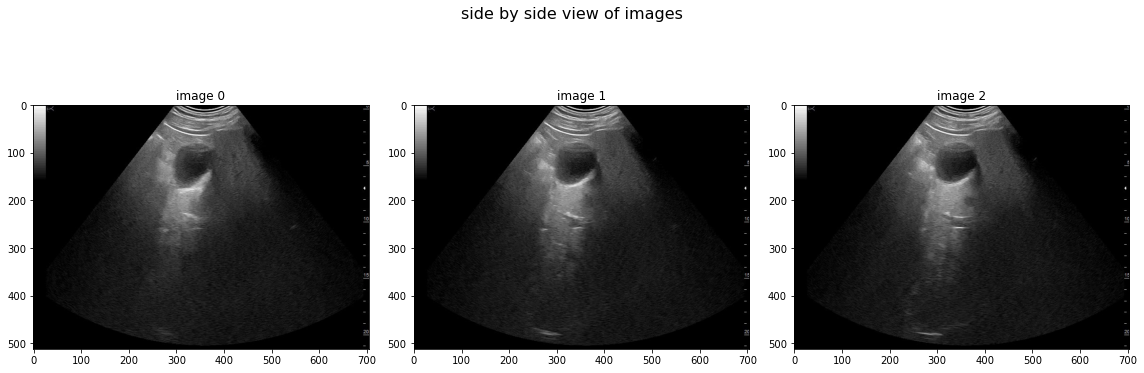

In [5]:


displaySideBySide(imagesInitials,1,3)


In [6]:
#Read the csv points files
points5_df = pd.read_csv(os.path.join(file_path,points5_file),sep=";")
points6_df = pd.read_csv(os.path.join(file_path,points6_file),sep=";")
points7_df = pd.read_csv(os.path.join(file_path,points7_file),sep=";")



In [7]:
#Read the centers points files 
CP5_df=pd.read_csv(os.path.join(file_path,CenterP5_file),sep=";")
CP6_df=pd.read_csv(os.path.join(file_path,CenterP6_file),sep=";")
CP7_df=pd.read_csv(os.path.join(file_path,CenterP7_file),sep=";")

In [8]:
CP5_df.head()

,X Coordinate,Y Coordinate
0,346,129


In [9]:
CP6_df.head()
CP6_df.keys()

Index(['X Coordinate', 'Y Coordinate'], dtype='object')

In [10]:
CP7_df.head()
CP7_df.keys()

Index(['X Coordinate', 'Y Coordinate'], dtype='object')

In [11]:
points5_df.head()


,Angle,x,y
0,0,392,129
1,2,391,130
2,4,363,130
3,6,364,130
4,8,386,134


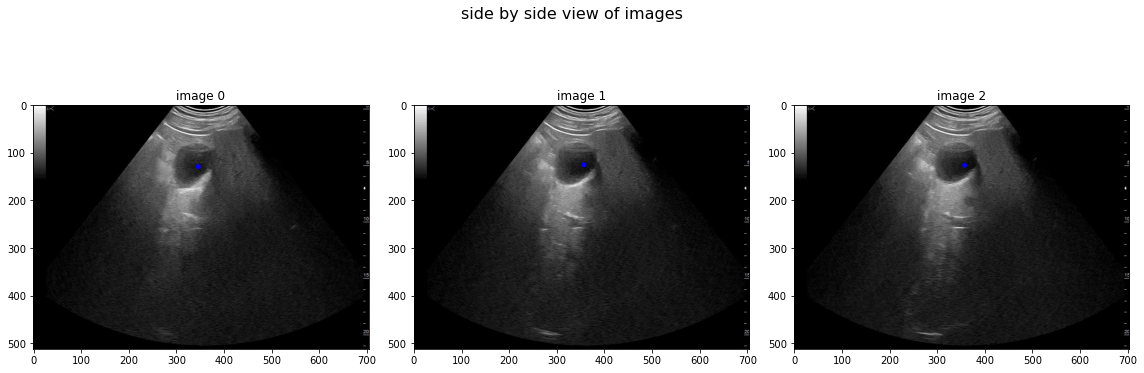

In [12]:
#plot the center point on the images 
#plot center on image 5
# Get the center coordinate.
x_center=int(CP5_df.get(['X Coordinate'][0]) )
y_center =int(CP5_df.get(['Y Coordinate'][0]))

imgpltC5=image5.copy()
imgpltC5 = cv2.circle(imgpltC5, (x_center,y_center), radius=0, color=(255, 0, 0), thickness=10)

#plot center on image 6
# Get the center coordinate.
x_center=int(CP6_df.get(['X Coordinate'][0]) )
y_center =int(CP6_df.get(['Y Coordinate'][0]))

imgpltC6=image6.copy()
imgpltC6 = cv2.circle(imgpltC6, (x_center,y_center), radius=0, color=(255, 0, 0), thickness=10)


#plot center on image 7
# Get the center coordinate.
x_center=int(CP7_df.get(['X Coordinate'][0]) )
y_center =int(CP7_df.get(['Y Coordinate'][0]))

imgpltC7 =image7.copy()
imgpltC7 = cv2.circle(imgpltC7, (x_center,y_center), radius=0, color=(255, 0, 0), thickness=10)

imagesCenters=[imgpltC5,imgpltC6,imgpltC7]
displaySideBySide(imagesCenters,1,3)




Plot initals points on the images

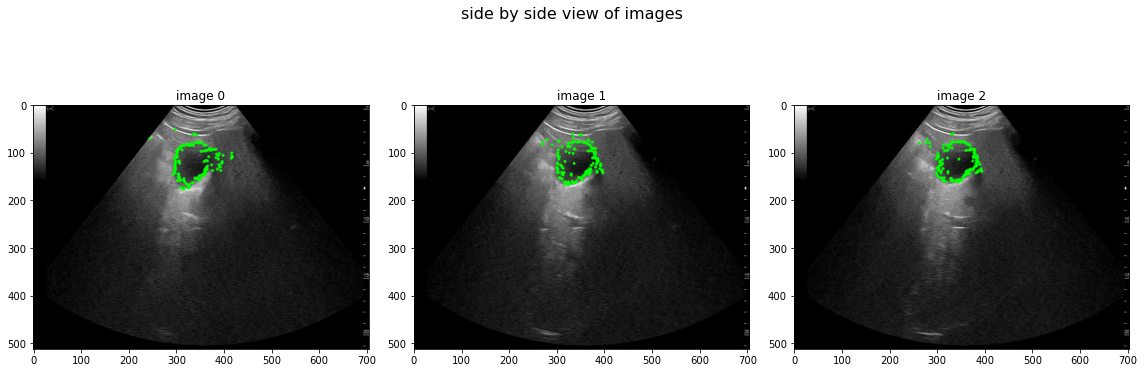

In [13]:
#Plot points for image 5
data = points5_df.values
imgplt5 = image5.copy()
for i in range(len(data)):
    x=data[i][1]
    y=data[i][2]
    imgplt5= cv2.circle(imgplt5, (x,y), radius=0, color=(0, 255, 0), thickness=5)

#Plot points for image 6
data = points6_df.values
imgplt6 = image6.copy()
for i in range(len(data)):
    x=data[i][1]
    y=data[i][2]
    imgplt6= cv2.circle(imgplt6, (x,y), radius=0, color=(0, 255, 0), thickness=5)



#Plot points for image 7
data = points7_df.values
imgplt7 = image7.copy()
for i in range(len(data)):
    x=data[i][1]
    y=data[i][2]
    imgplt7= cv2.circle(imgplt7, (x,y), radius=0, color=(0, 255, 0), thickness=5)


imagesPoints=[imgplt5,imgplt6,imgplt7]

displaySideBySide(imagesPoints,1,3)





Dilatation function 

In [14]:
def Dilation(src,dilatation_size):

    dilatation_type = cv2.MORPH_RECT
    #title_dilatation_window = 'Dilation Demo'


    element = cv2.getStructuringElement(dilatation_type, (2*dilatation_size + 1, 2*dilatation_size+1), (dilatation_size,                  dilatation_size))

    dilatation_dst = cv2.dilate(src, element)
    return(dilatation_dst)
    


In [15]:
#Return an image labeled by colors of the diffrent connected components 

def display_components(labels):    
    # Map component labels to hue val
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # cvt to BGR for display
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0
    return(labeled_img)



Method 1 ://///////////////////////////////////////////////////////////////////////////////////////////////
Remove small components 

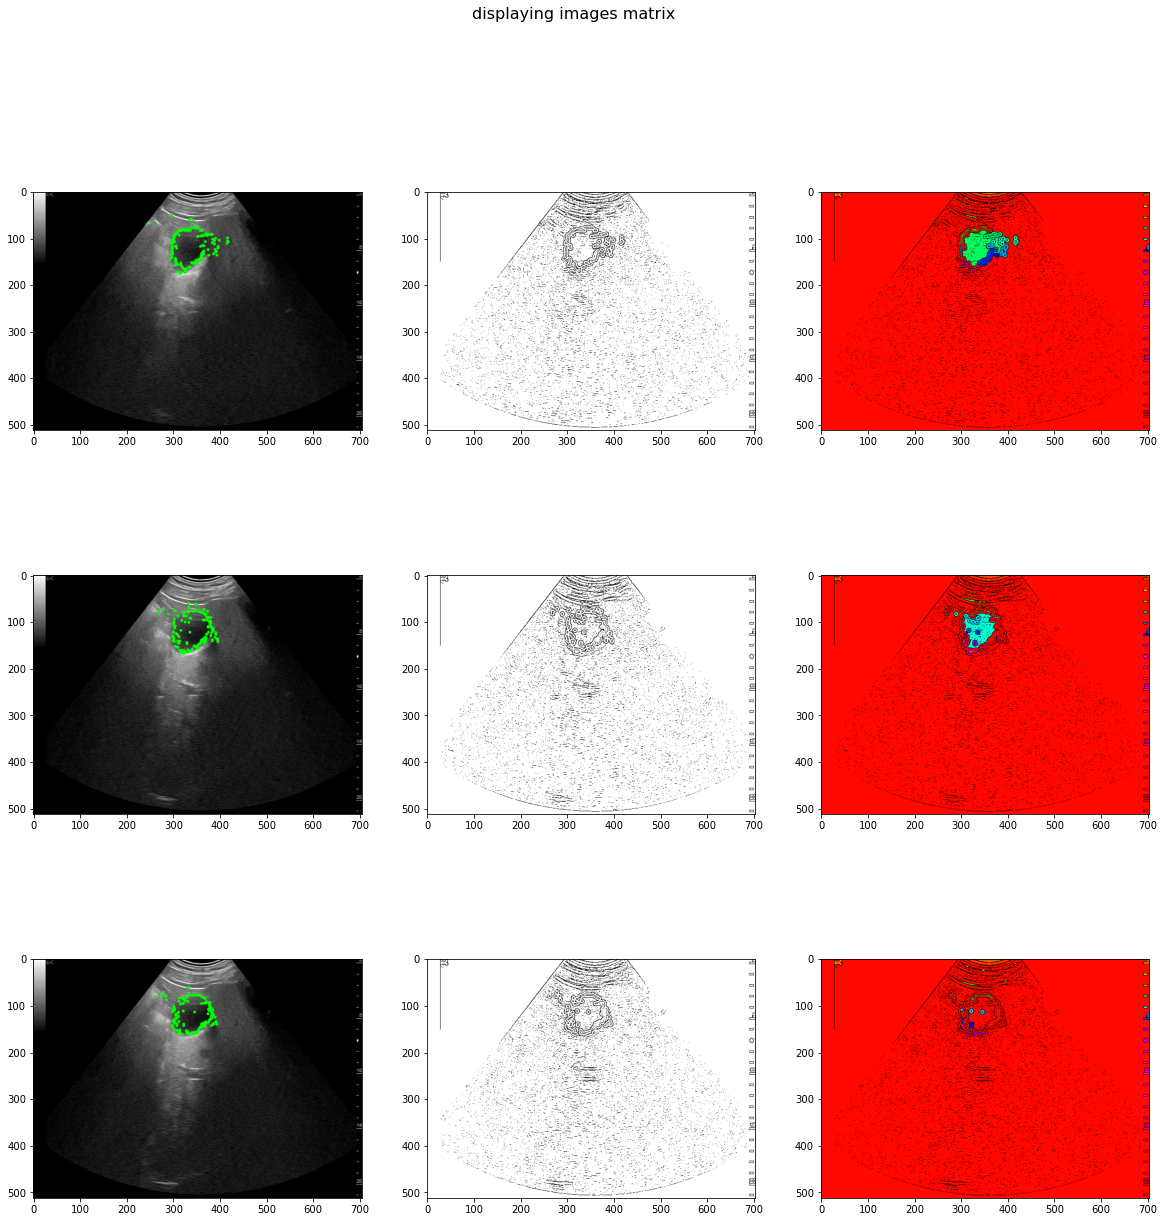

In [16]:

dataImages=[imgplt5,imgplt6,imgplt7]   #images with their initials points 
all_images=[]          
NUM_ROWS = 3
IMGs_IN_ROW = 3              
#to save all images with their diffrent transformations 
for i, image in enumerate(dataImages):
    #do dilatation
    dilatation_dst=Dilation(image,1)
    #laplacian_dist=cv2.Laplacian(src,2)
    #Convert to gray scale
    grey_image=cv2.cvtColor(dilatation_dst,cv2.COLOR_BGR2GRAY)
    #Convert to binary
    binary_image=cv2.adaptiveThreshold(grey_image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,3,4)
    #binary_image=cv2.adaptiveThreshold(grey_image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,3,4)
    #Compute  connected components
    num_labels, labels_im = cv2.connectedComponents(binary_image,connectivity=4)
    labeled_img=display_components(labels_im)
    all_images.append(image)
    all_images.append(binary_image)
    all_images.append(labeled_img)

displayInLine(all_images,NUM_ROWS,IMGs_IN_ROW)

    


Method 2 ://////////////////////////////////////////////////////////////////////////////////////////////

In [17]:
    # Convert BGR to HSV
    def getColorComponenet(lower_color,upper_color,image):
        hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        # Threshold the HSV image to get only blue colors
        mask = cv2.inRange(hsv, lower_color, upper_color)
        # Bitwise-AND mask and original image
        res = cv2.bitwise_and(image,image, mask= mask)
        
        return mask, res


In [18]:
#just to find the corresponding green values in HSV
#green = np.uint8([[[200,255,200]]])
#plt.imshow(green)
#hsv_green = cv2.cvtColor(green,cv2.COLOR_BGR2HSV)
#print(hsv_green)

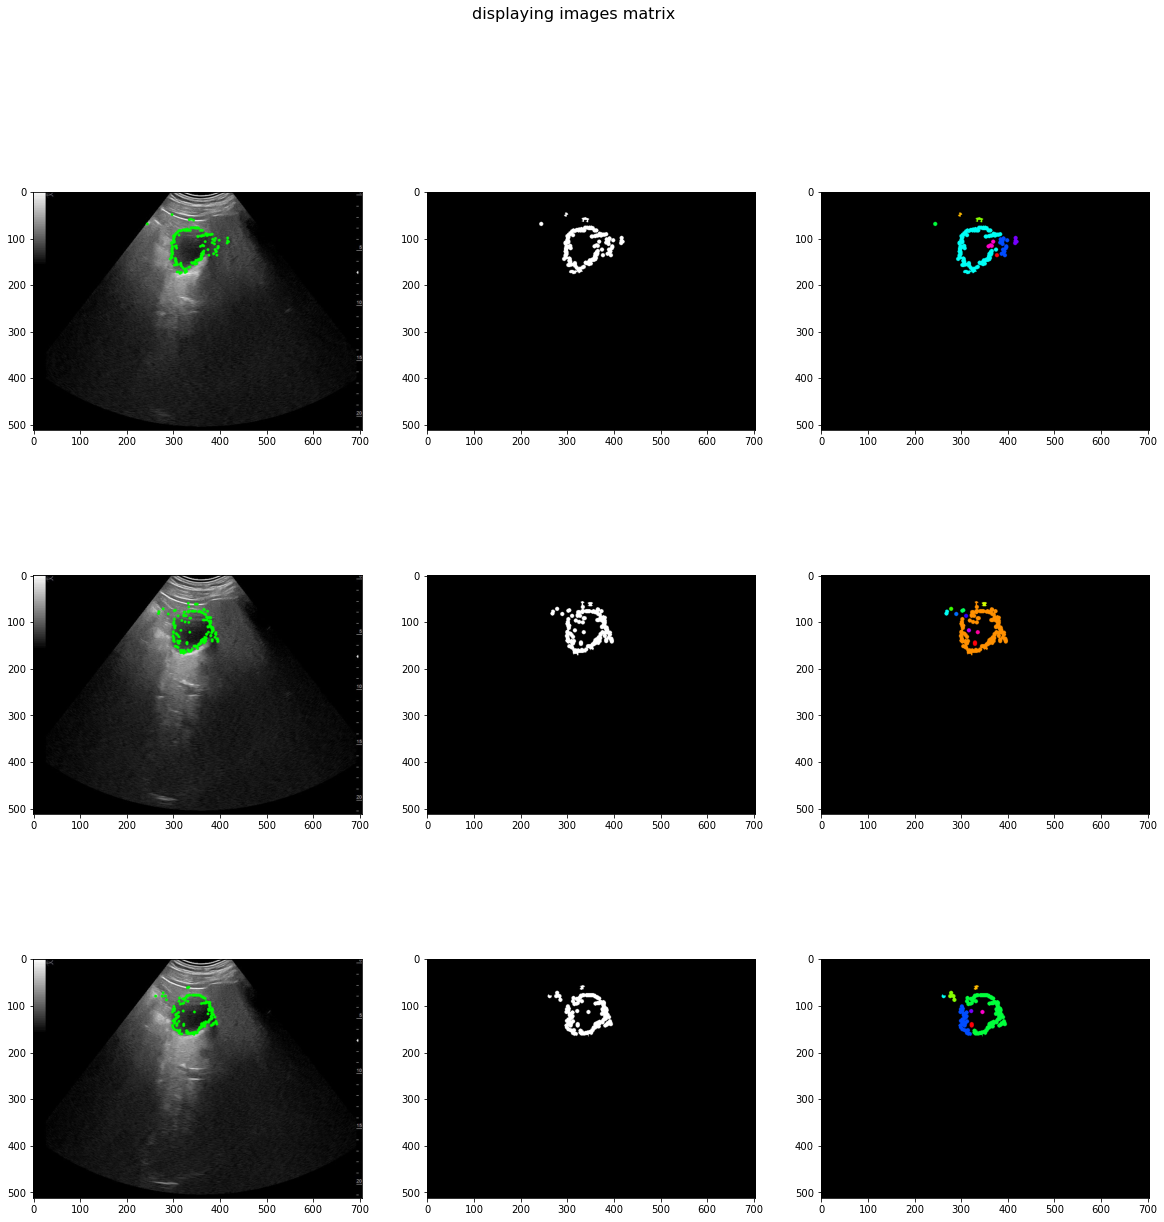

In [19]:
dataImages=[imgplt5,imgplt6,imgplt7]   #images with their initials points 
all_images=[] 
NUM_ROWS = 3
IMGs_IN_ROW = 3
lower_green=np.array([60,55,255])
upper_green=np.array([60,255,255])
dilitation_size=1


#to save all images with their diffrent transformations 
for i, image in enumerate(dataImages):
    #do dilatation
    dilatation_dst=Dilation(image,1)
    #get the green part 
    mask,res =getColorComponenet(lower_green,upper_green,dilatation_dst)
    #Compute  connected components
    #num_labels, labels_im = cv2.connectedComponents(mask,connectivity=8)
    nb_labels, labels_im, stats, centroids = cv2.connectedComponentsWithStats(mask, connectivity=8)
    labeled_img=display_components(labels_im)
    
    all_images.append(image)
    all_images.append(mask)
    all_images.append(labeled_img)

displayInLine(all_images,NUM_ROWS,IMGs_IN_ROW) 
   


    

[  49   98  101 5016  238]


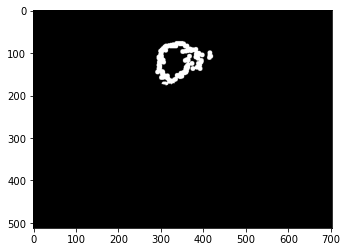

In [23]:

dilatation_size=2
dilatation_dst=Dilation(imagesPoints[0],dilatation_size)
mask,res =getColorComponenet(lower_green,upper_green,dilatation_dst)
nb_labels, labels_im, stats, centroids = cv2.connectedComponentsWithStats(mask,connectivity=8)
sizes = stats[1:, -1]
nb_labels=nb_labels-1

print(sizes)
min_size=200

img2 = np.zeros((labels_im.shape))
#for every component in the image, you keep it only if it's above min_size
for i in range(0, nb_labels):
    if sizes[i] >= min_size:
        img2[labels_im == i + 1] = 255
        
        

        

plt.imshow(img2,cmap="gray")


    




3


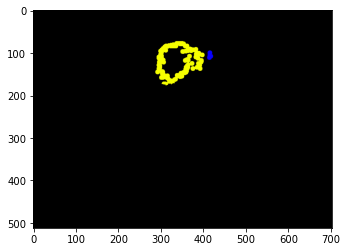

In [24]:
img2=img2.astype(np.uint8) 
nb_labels, labels_im, stats, centroids = cv2.connectedComponentsWithStats(img2, connectivity=8)
labeled_img = display_components(labels_im)
plt.imshow(labeled_img)
print(nb_labels)

In [22]:
#The Algorithm 
dilitation_size=0
all_images =[]
for i, image in enumerate(dataImages):
    #do dilatation
    dilatation_dst=Dilation(image,dilatation_size)
    #get the green part 
    mask,res =getColorComponenet(lower_green,upper_green,dilatation_dst)
    #Compute  connected components
    #num_labels, labels_im = cv2.connectedComponents(mask,connectivity=8)
    nb_labels, labels_im, stats, centroids = cv2.connectedComponentsWithStats(mask, connectivity=8)
    labeled_img=display_components(labels_im)
    all_images.append(image)
    all_images.append(labeled_img)
    
    

